In [ ]:
#24/7/24 For gauging the general effectiveness of ML algos on mutagen Padel Data
#borrowing code from Parvin Mansouri


mlp cv accuracy scores for train is : [0.67045455 0.625      0.66096866 0.6951567  0.66951567 0.47008547
 0.61538462 0.66666667 0.72364672 0.67806268]
mlp: Accuracy Score for above list: mean 64.75% std (6.60%)
mlp: Accuracy 65.40%
mlp: Precision-Recall 61.26%
mlp: Matthews Coefficient 30.65%
mlp: Cohen Kappa Score 30.49%
mlp: ROC AUC Score 65.19%
              precision    recall  f1-score   support

    nonABF 0       0.66      0.59      0.62      1696
       ABF 1       0.65      0.71      0.68      1816

    accuracy                           0.65      3512
   macro avg       0.65      0.65      0.65      3512
weighted avg       0.65      0.65      0.65      3512

model score on training data: 0.5649202733485194
test set predicion
[[205  14]
 [194  26]]
0.5261958997722096
0.65
0.11818181818181818
0.19999999999999998
SVC_sig cv accuracy scores for train is : [0.51704545 0.49431818 0.51851852 0.57834758 0.5014245  0.59259259
 0.55270655 0.53561254 0.50997151 0.51282051]
SVC_sig: Accu

KeyboardInterrupt: 

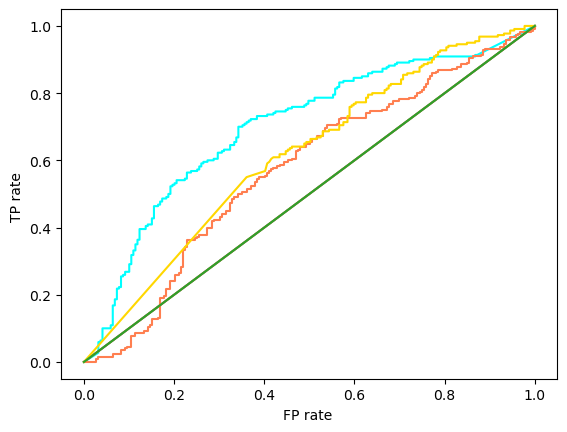

In [2]:
#!/usr/bin/env python
# coding: utf-8
import seaborn as sns
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from os import path
from sklearn import metrics
from sklearn.metrics import accuracy_score, cohen_kappa_score,f1_score,roc_curve, roc_auc_score,recall_score, matthews_corrcoef, average_precision_score, confusion_matrix, precision_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from modlamp.ml import train_best_model, score_cv
from modlamp.ml import plot_validation_curve
from modlamp.ml import predict

targetdata = pd.read_csv('/Users/james/Documents/Honours/Data/structdata/Mutagen/Padel/mutagen_padel.csv')
targetdata = targetdata.dropna(axis=0)
colors=["aqua","coral","gold","darkgreen","tomato","teal", "pink", "yellowgreen","plum","red","blue","crimson","orangered","black"]
seed= 81

trainset, testvalid = train_test_split(targetdata, test_size=0.2, random_state=seed)

testset, validset = train_test_split(testvalid, test_size=0.5, random_state=seed)

y_train = trainset['Toxicity_Value'].values
x_train = trainset.iloc[:, 1:]

y_test = testset['Toxicity_Value'].values
x_test = testset.iloc[:, 1:]

yvalid = validset['Toxicity_Value'].values
xvalid = validset.iloc[:, 1:]

models = []
models.append(('mlp', MLPClassifier(max_iter=2000)))
models.append(('SVC_sig', SVC(kernel="sigmoid",probability=(True))))
models.append(('NB', GaussianNB()))
models.append(('SVC_lr', SVC(kernel="linear",probability=(True))))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LOGREG', LogisticRegression()))
models.append(('GBC', GradientBoostingClassifier(random_state=20)))
models.append(('RFC', RandomForestClassifier(random_state=seed)))
models.append(('ADC', AdaBoostClassifier()))
models.append(('SVC_poly', SVC(kernel="poly",probability=(True))))
models.append(('SVC_rbf', SVC(kernel='rbf',probability=(True))))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LDA', LinearDiscriminantAnalysis()))
kfold = KFold(n_splits=10, random_state=seed, shuffle= True)
# skfold =StratifiedKFold(n_splits=10, random_state=seed, shuffle= True)


results = []
names = []
i = 0
for name, model in models:

    # Scores means and std deviations
    cv_scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy',n_jobs=(4))
    print("{} cv accuracy scores for train is : {}".format(name, cv_scores))
    results.append(cv_scores)
    names.append(name)
    print("%s: Accuracy Score for above list: mean %0.2f%% std (%0.2f%%)" % (name, 100*cv_scores.mean(), 100*cv_scores.std()))

    # Predictions Train  Set
    cv_preds = cross_val_predict(model, x_train, y_train, cv=kfold)
    print("%s: Accuracy %0.2f%%" % (name, 100*metrics.accuracy_score(y_train, cv_preds)))
    print("%s: Precision-Recall %0.2f%%" % (name, 100*metrics.average_precision_score(y_train, cv_preds)))
    print("%s: Matthews Coefficient %0.2f%%" % (name, 100*matthews_corrcoef(y_train, cv_preds)))
    print("%s: Cohen Kappa Score %0.2f%%" % (name, 100*metrics.cohen_kappa_score(y_train, cv_preds)))
    print("%s: ROC AUC Score %0.2f%%" % (name, 100*metrics.roc_auc_score(y_train, cv_preds)))
    target_names = ['nonABF 0', 'ABF 1']
    print(classification_report(y_train, cv_preds, target_names=target_names))

    model.fit(x_train,y_train)
    print(f'model score on training data: {model.score(x_train, y_train)}')
    model.predict(x_test)
    p =model.predict_proba(x_test)[:,1]
    pred = model.predict(x_test)
    print("test set predicion")
    print(confusion_matrix(y_test , pred))
    print(accuracy_score(y_test,pred))
    print(precision_score(y_test,pred))
    print(recall_score(y_test,pred))
    print(f1_score(y_test,pred))
    fpr_Bagging, tpr_Bagging, _ = roc_curve(y_test, p, pos_label=1.0)

    plt.plot(fpr_Bagging,tpr_Bagging, label=name, color=colors[i])
    #plt.annotate(color=colors[i])
    i+=1
    plt.xlabel('FP rate ')
    plt.ylabel('TP rate ')
    plt.plot([0,1],[0,1])
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.savefig(pathpng,dpi = 500)
plt.show()
fig = sns.boxplot(data=results)

fig.set_xticklabels(names,fontsize=5)
fig.set_title('word2vec\nComparison of models performance')
plt.xlabel('Binary Classifiers')
plt.ylabel('Model Accuracy')
plt.savefig(pathpng1,dpi = 500)
plt.show()
plt.close()


# In[ ]: